In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
Mushrooms = pd.read_csv("../Data/mushrooms.csv")

In [3]:
Mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
Mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
Mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df = Mushrooms.copy()

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.shape

(8124, 23)

In [9]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

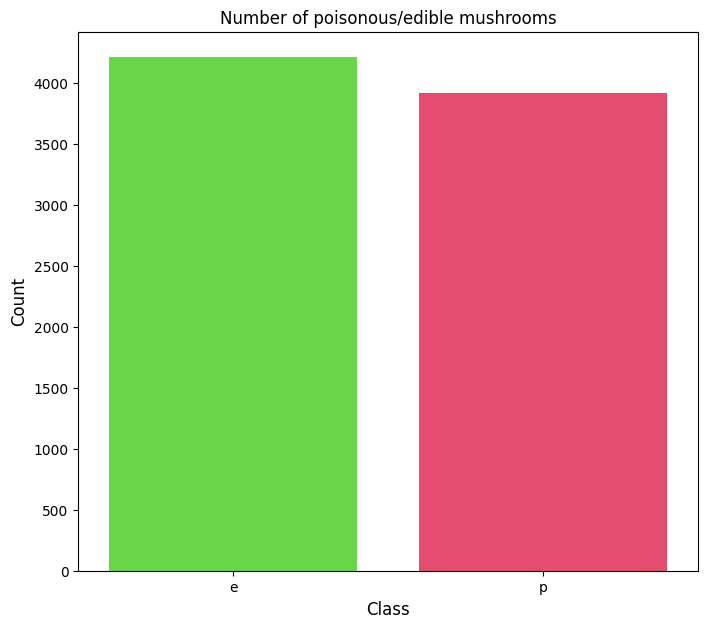

In [11]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x = count.index, y = count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [12]:
undummy_X = df.iloc[:,1:23]
undummy_y = df.iloc[:, 0]
X = pd.get_dummies(undummy_X)
y = pd.get_dummies(undummy_y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_test.shape

(1625, 117)

In [16]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [17]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=X_test.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7552      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 9,698
Trainable params: 9,698
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
204/204 [==============================] - 2s 4ms/step - loss: 0.2358 - accuracy: 0.9191 - val_loss: 0.0196 - val_accuracy: 0.9963
Epoch 2/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9952 - val_loss: 0.0047 - val_accuracy: 0.9982
Epoch 3/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 4/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 5/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 5.6392e-04 - val_accuracy: 1.0000
Epoch 6/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 2.8243e-04 - val_accuracy: 1.0000
Epoch 7/15
204/204 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.7256e-04 - val_accuracy: 1

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

51/51 [==============================] - 0s 3ms/step - loss: 4.1342e-06 - accuracy: 1.0000
Accuracy: 100.00
Loss: 0.00


In [24]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

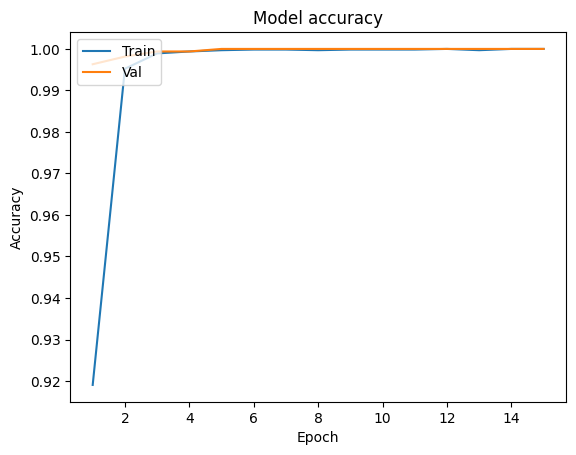

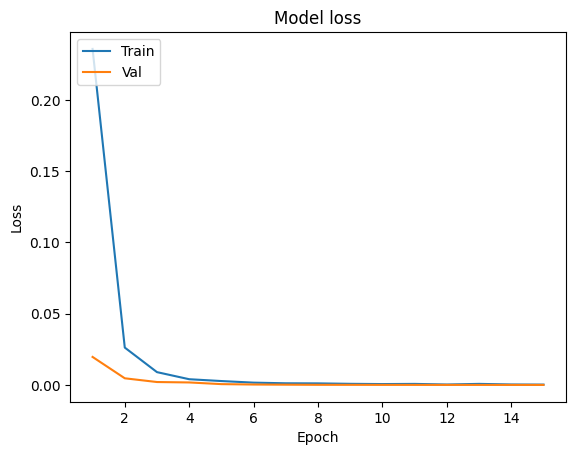

In [25]:
plot_learningCurve(history, 15)

In [27]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5
y_pred_int = y_pred.astype(int)
y_pred_int[:10]

51/51 [==============================] - 0s 1ms/step


array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])